# 이미지 딥러닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [3]:
(train_input, train_target) , (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [5]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


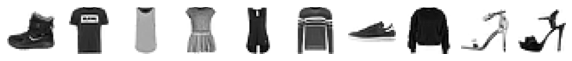

In [28]:
# fig 그림, axs 도화지
fig, axs = plt.subplots(1,10,figsize=(10,10)) 
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [30]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

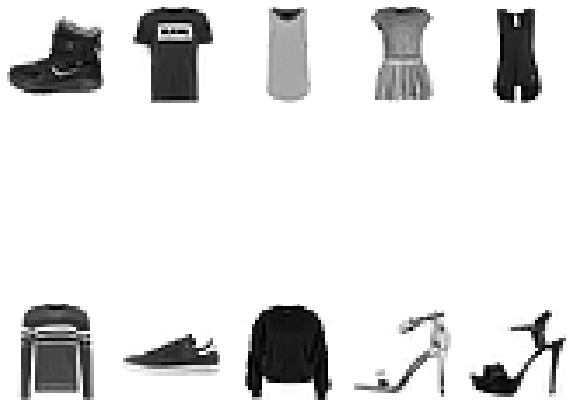

In [31]:
fig, axs = plt.subplots(2,5,figsize=(10,10)) 
k = 0
for i in range(2):
    for v in range(5):
        axs[i][v].imshow(train_input[k],cmap='gray_r')
        axs[i][v].axis('off')
        k =k+1
plt.show()

In [19]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [20]:
pd.Series(train_target).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

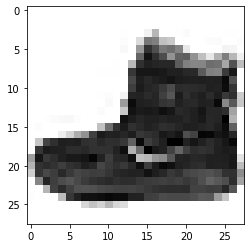

In [22]:
plt.imshow(train_input[0],cmap='gray_r')

In [32]:
28*28

784

In [26]:
# 2차원 데이터 사용못하기 때문에 형태바꿔줘야함 

x_train = train_input.reshape(60000,28*28)  #  60000개, 1차원데이터
x_test = test_input.reshape(10000,28*28)
y_train = train_target
y_test = test_target

In [33]:
x_train.shape

(60000, 784)

In [36]:
# y값 one-hot벡터 형태로 바꿔주기

y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

## 머신러닝

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log.score(x_test,y_test)

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8412

## deep learning

In [38]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(128, input_dim=28*28, activation='relu'))
    model.add(Dense(56,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 56)                7224      
                                                                 
 dense_8 (Dense)             (None, 10)                570       
                                                                 
Total params: 108,274
Trainable params: 108,274
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
hist = model.fit(x_train, y_train_oh, validation_split=0.2 , epochs=50, batch_size=20)

Epoch 1/50
2400/2400 [==============================] - 8s 3ms/step - loss: 2.3676 - accuracy: 0.7368 - val_loss: 0.6526 - val_accuracy: 0.7893
Epoch 2/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.6540 - accuracy: 0.7887 - val_loss: 0.6321 - val_accuracy: 0.7815
Epoch 3/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.5783 - accuracy: 0.8043 - val_loss: 0.5472 - val_accuracy: 0.8236
Epoch 4/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.5198 - accuracy: 0.8218 - val_loss: 0.5489 - val_accuracy: 0.8142
Epoch 5/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4854 - accuracy: 0.8315 - val_loss: 0.4972 - val_accuracy: 0.8332
Epoch 6/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4586 - accuracy: 0.8378 - val_loss: 0.5441 - val_accuracy: 0.8095
Epoch 7/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4389 - accuracy: 0.8462 - val_loss: 0.4665 - val_accuracy:

In [41]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 4ms/step - loss: 0.5253 - accuracy: 0.8492


[0.5252902507781982, 0.8492000102996826]

# CNN

In [17]:
# image matrix데이터를 vectorizing 하지 말고, matrix 구조 그대로 학습 =>CNN